In [1]:
import numpy as np
import scipy
import sklearn
import _pickle
import matplotlib.pyplot as plt
from IPython.display import display, Image
from scipy import ndimage

import tensorflow as tf

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

In [50]:
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.learn.python.learn.datasets.mnist import extract_images,extract_labels

In [84]:
mnist = input_data.read_data_sets("F:\DataAnalysis&MachineLearning\ResearchAttempt\WorkWithIan\Dataset\mnist", one_hot=True)
SOURCE_URL = 'http://yann.lecun.com/exdb/mnist/'
TRAIN_IMAGES = 'train-images-idx3-ubyte.gz'
TRAIN_LABELS = 'train-labels-idx1-ubyte.gz'
TEST_IMAGES = 't10k-images-idx3-ubyte.gz'
TEST_LABELS = 't10k-labels-idx1-ubyte.gz'

with open("train-images-idx3-ubyte.gz", 'rb') as f:
    train_images = extract_images(f)

with open("train-labels-idx1-ubyte.gz", 'rb') as f:
    train_labels = extract_labels(f, one_hot=True)

 # Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

# The raw formulation of cross-entropy,
  #
  #   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
  #                                 reduction_indices=[1]))
  #
  # can be numerically unstable.
  #
  # So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
  # outputs of 'y', and then average across the batch.
cross_entropy = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

(60000, 10)
(60000, 28, 28, 1)


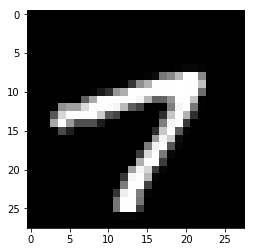

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


In [67]:
print(np.shape(train_labels))
print(np.shape(train_images))

#print(train_images[0])
train_images_reshaped = np.reshape(train_images,newshape=(60000,784))
#print(train_images_reshaped[0,148:176])
plt.imshow(np.reshape(train_images_reshaped[101],newshape=(28,28)),cmap='gray')
plt.show()
print(train_labels[101])

In [92]:
sess_tf = tf.InteractiveSession()

## Initialize the variables
tf.global_variables_initializer().run()
for _ in range(1000):
    sess_tf.run(train_step, feed_dict={x: train_images_reshaped, y_: train_labels})

In [93]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess_tf.run(accuracy, feed_dict={x: train_images_reshaped,y_: train_labels}))

0.925133


Extracting t10k-images-idx3-ubyte.gz
Extracting t10k-labels-idx1-ubyte.gz


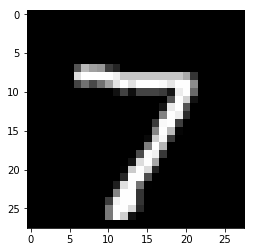

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


In [79]:
with open("t10k-images-idx3-ubyte.gz", 'rb') as f:
    test_images = extract_images(f)

with open("t10k-labels-idx1-ubyte.gz", 'rb') as f:
    test_labels = extract_labels(f, one_hot=True)
    
test_images_reshaped = np.reshape(test_images,newshape=(10000,784))
plt.imshow(np.reshape(test_images_reshaped[0],newshape=(28,28)),cmap='gray')
plt.show()
print(test_labels[0])

In [94]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess_tf.run(accuracy, feed_dict={x: test_images_reshaped,y_: test_labels}))

0.9197
